### Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

### Описание данных games.csv

Name — название игры\ Platform — платформа\ Year_of_Release — год выпуска\ Genre — жанр игры\ NA_sales — продажи в Северной Америке (миллионы долларов)\ EU_sales — продажи в Европе (миллионы долларов)\ JP_sales — продажи в Японии (миллионы долларов)\ Other_sales — продажи в других странах (миллионы долларов)\ Critic_Score — оценка критиков (от 0 до 100)\ User_Score — оценка пользователей (от 0 до 10)\ Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.\

*Данные за 2016 год могут быть неполными.

### План работы
- Открытие файла данных и получение общей информации
- Подготовка данных
- Исследовательский анализ данных
- Портрет пользователя каждого региона
- Проверка гипотез
- Общие выводы

### 1. Открытие файла данных и получение общей информации

In [378]:
#импортируем pandas
import pandas as pd

In [379]:
#боремся с предупреждениями
import warnings
warnings.filterwarnings("ignore")

In [380]:
#импортируем библиотеки для работы с графиками и гипотезами
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [381]:
#читаем файл
data = pd.read_csv('/datasets/games.csv')

In [382]:
#выводим первые пять строк
data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [383]:
#выводим основную информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [384]:
#проверим на явные дубликаты
data.duplicated().sum()

0

**Выводы**
- Названия столбцов нужно будет привести к змеиному регистру
- Тип данных с годом выпуска заменить на int
- Тип данных с рейтингом пользователей заменить на float
- Явных дубликатов нет

### 2. Подготовка данных

In [385]:
#приводим названия столбцов к змеиному регистру
data.columns = data.columns.str.lower()

In [386]:
#считаем пропуски в данных и их долю от общего кол-ва строк
data_omissions = pd.DataFrame(data.isna().sum())
data_omissions['rate'] = data.isna().sum() / 16715
data_omissions.columns = ['number', 'rate']
data_omissions

,number,rate
name,2,0.000120
platform,0,0.000000
year_of_release,269,0.016093
genre,2,0.000120
na_sales,0,0.000000
eu_sales,0,0.000000
jp_sales,0,0.000000
other_sales,0,0.000000
critic_score,8578,0.513192
user_score,6701,0.400897


Данные о годе выпуска, жанре, названии игры являются важными, при этом доля пропусков менее 2% от общего числа строк. Удалим эти пропуски. 

In [387]:
#удалим пропуски в годе выпуска, жанре, названиях игр
data = data.dropna(subset=['name', 'year_of_release', 'genre'])

In [388]:
#проверим, какие значения есть в оценках пользователей
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [389]:
print('Количество игр, у которых user_score равен tbd, составляет:', data.query('user_score == "tbd"')['user_score'].count())

Количество игр, у которых user_score равен tbd, составляет: 2376


Оценка tbd означает, что рейтинг не определен. Хотя доля таких оценок в общем объеме данных достаточно велика (15%), заменить эти пропуски данными не представляется возможным. Таким образом, данное значение логичнее заменить на пропуск. 

In [390]:
#заменяем tbd на пропуски
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [391]:
#проверим, какие значения есть в оценках критиков
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

В оценках критиков неожиданных значений нет.

In [392]:
#приводим зачения с годом выпуска к целочисленному типу
data['year_of_release'] = data['year_of_release'].astype('int32')

In [393]:
#снова проверим пропуски
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [394]:
#проверим типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


In [395]:
#проверим на неявные дубликаты столбец platform
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [396]:
#проверим на неявные дубликаты столбец genre
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [397]:
#считаем суммарные продажи во всех регионах
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [398]:
#выводим первые пять строк для проверки
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


**Выводы**

Проведена следующая подготовка данных:
- заменили названия столбцов (привели к нижнему регистру);
- преобразовали данные в столбце с годом выпуска в целочисленный тип, т.к. год не может быть дробным;
- в столбце с оценками пользователей рейтинг tbd (не опеределен) заменили на пропуски;
- оценки пользователей привели к типу float;
- проверили данные на неявные дубликаты;
- посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.

### 3. Исследовательский анализ данных

#### 3.1. Анализ данных за весь период

<AxesSubplot:title={'center':'Количество выпущенных игр по годам'}, xlabel='year_of_release'>

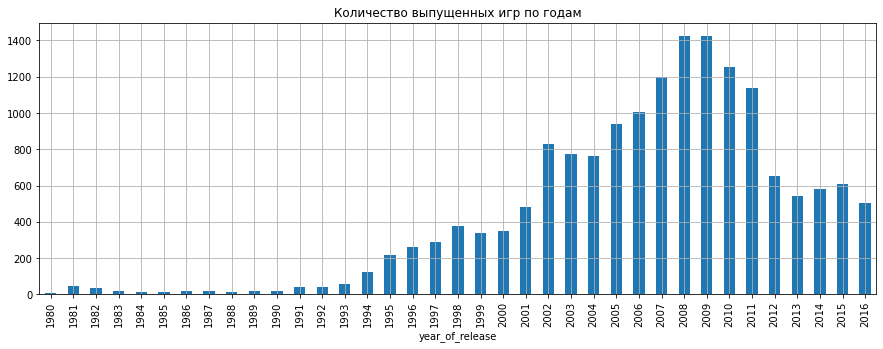

In [399]:
#смотрим, сколько игр выпускалось в разные годы
(data.groupby('year_of_release')['name'].count().
 plot(kind='bar', grid=True, title='Количество выпущенных игр по годам', 
      figsize=(15, 5))
)

Для анализа срока жизни платформ, скорости появления новых платформ, общего состояния рынка необходимы данные за все имеющиеся периоды. Для прогноза на 2017 год необходимы данные за последние 3-5 лет.

Проанализируем срок жизни платформ и скорость появления новых по 10 платформам с максимальными объемами продаж за весь имеющийся период. 

<AxesSubplot:title={'center':'Платформы с наибольшими суммарными продажами'}, xlabel='platform'>

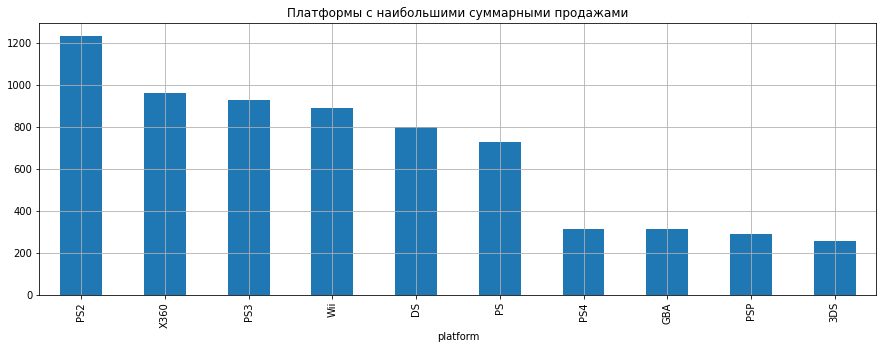

In [400]:
#определяем топ 10 платформ по объемам продаж за всё время
top_platforms = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms = top_platforms[0:10]
top_platforms.plot(kind='bar', grid=True, title='Платформы с наибольшими суммарными продажами', figsize=(15, 5))

<AxesSubplot:title={'center':'Динамика продаж по топ-10 платформам'}, xlabel='year_of_release'>

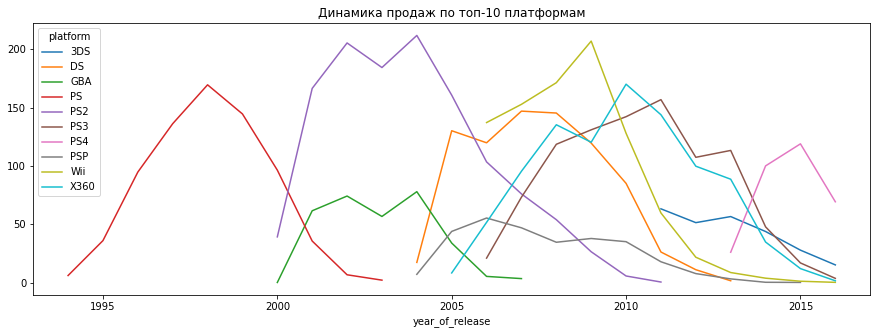

In [401]:
#смотрим, как менялись продажи на этих платформах за всё время
(data.query('platform in @top_platforms.index').
 pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').
 plot(figsize=(15, 5), title='Динамика продаж по топ-10 платформам', xlim=(1993, 2017))
)

Рассмотрим распределение продаж на топ-10 платформах по годам более детально.

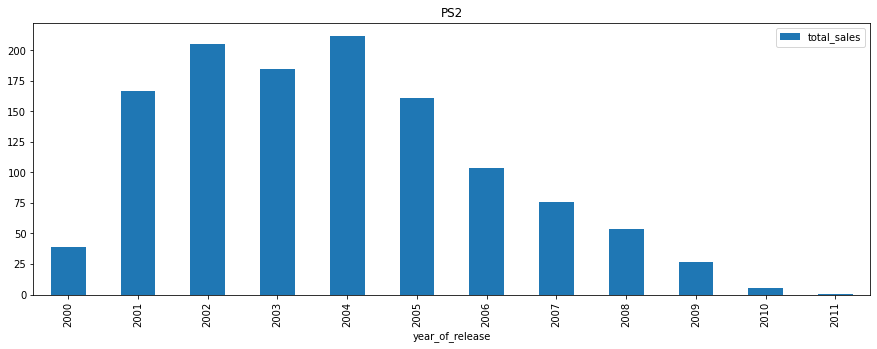

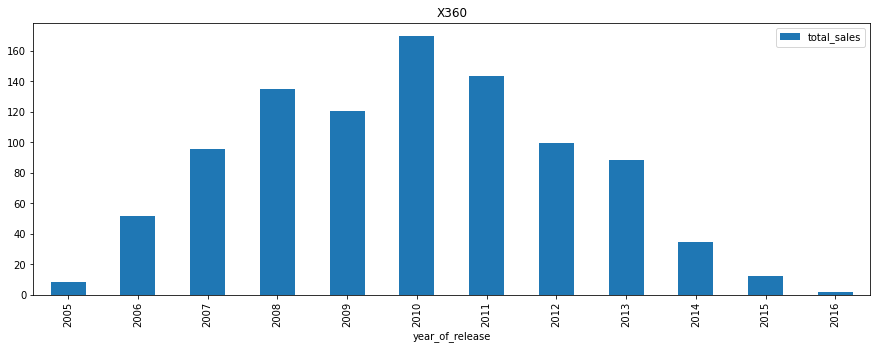

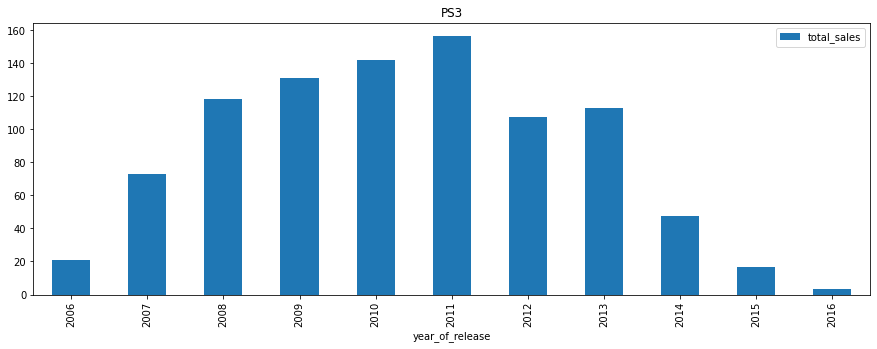

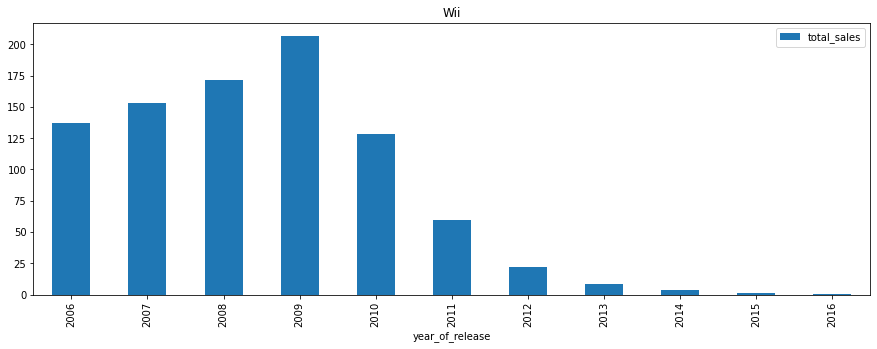

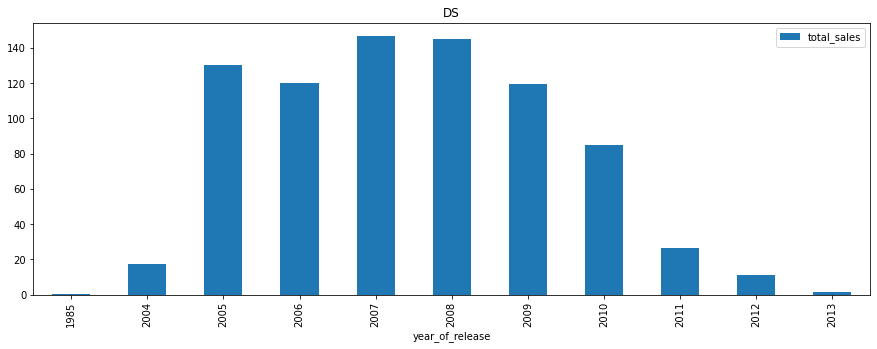

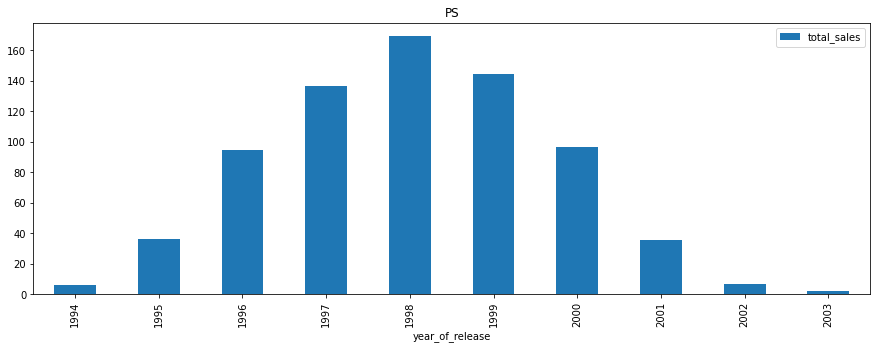

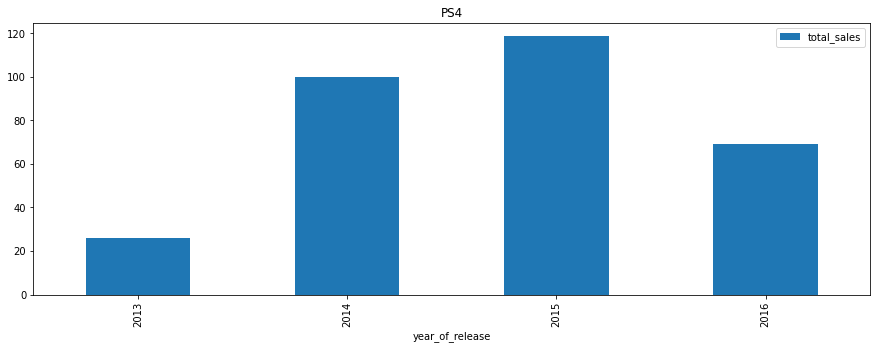

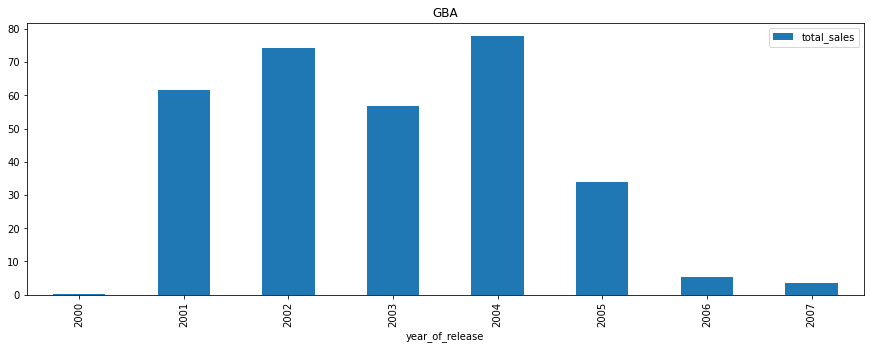

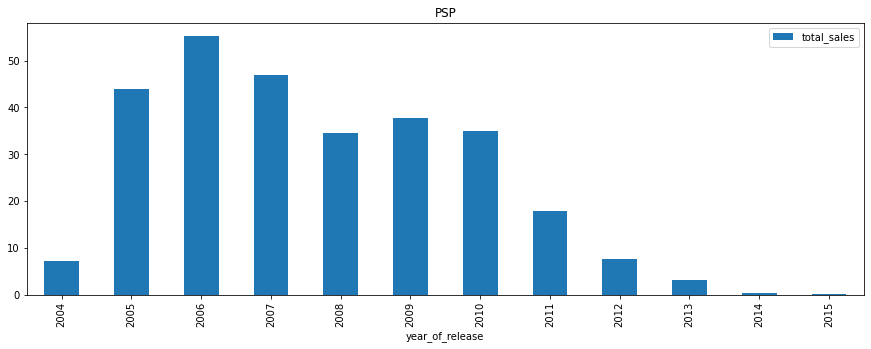

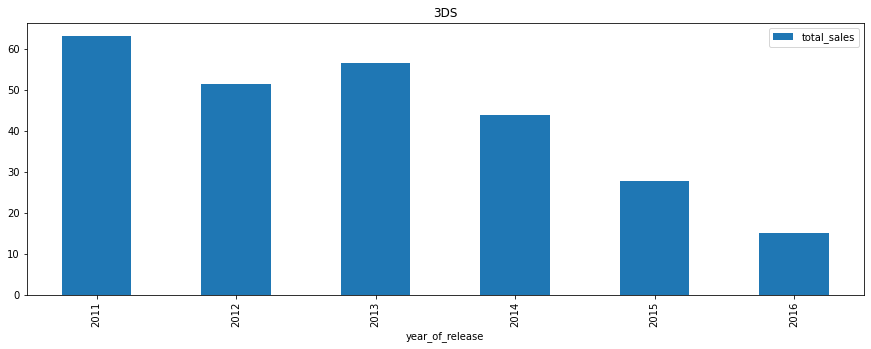

In [402]:
#строим графики для 10 платформ
for platform in top_platforms.index:
    (data[data['platform'] == platform].
     pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum').
     plot(kind = 'bar', figsize=(15,5))
    )
    plt.title(platform)

**Выводы**
- В среднем срок жизни платформы 10 лет
- Большинство платформ появилось с 2004 по 2006

#### 3.2. Выбор актуального периода и анализ данных

Для прогноза на 2017 год наиболее актуальными будут данные за предыдущие годы, предлагаю взять предыдущие 5 лет, чтобы была возможность увидеть общие тенденции по разным платформам.

In [403]:
#выбираем данные за 5 лет и заносим в data_actual
data_actual = data.query('(year_of_release >= 2012) and (year_of_release <= 2016)')

In [404]:
#выводим платформы, по которым есть данные в актуальном периоде
platform_actual = data_actual.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
platform_actual

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,51.36,56.57,43.76,27.78,15.14
DS,11.01,1.54,NaN,NaN,NaN
PC,23.22,12.38,13.28,8.52,5.25
PS3,107.36,113.25,47.76,16.82,3.60
PS4,NaN,25.99,100.00,118.90,69.25
PSP,7.69,3.14,0.24,0.12,NaN
PSV,16.19,10.59,11.90,6.25,4.25
Wii,21.71,8.59,3.75,1.14,0.18
WiiU,17.56,21.65,22.03,16.35,4.60


Выберем только те платформы, которые существуют на момент анализа (примем условие, что их продажи в 2015 году не равны нулю, т.к. данные за 2016 год могут быть неполными)

In [405]:
#оставляем только "живые" платформы
platform_actual = platform_actual[2015].dropna()

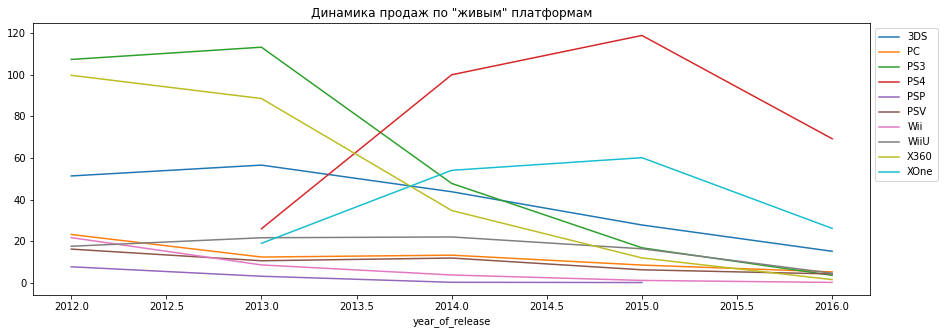

In [406]:
#строим график продаж по "живым" платформам за актуальный период
data_actual = data_actual.query('platform in @platform_actual.index')
(data_actual.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum').
 plot(figsize=(15, 5), title='Динамика продаж по "живым" платформам').
 legend(bbox_to_anchor=(1.0, 1.0),
    fontsize='medium')
)

In [407]:
#выведем рейтинг платформ по объемам продаж в 2016 году
data_actual[data_actual['year_of_release'] == 2016].groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: total_sales, dtype: float64

Из графика видно, что все платформы показывают снижение продаж. На момент анализа наиболее прибыльными платформами являются PS4, XOne, 3DS, а также PC, которая показывает меньший, но достаточно стабильный объем продаж.

Строим график "ящик с усами" - диаграмму размаха.

<AxesSubplot:>

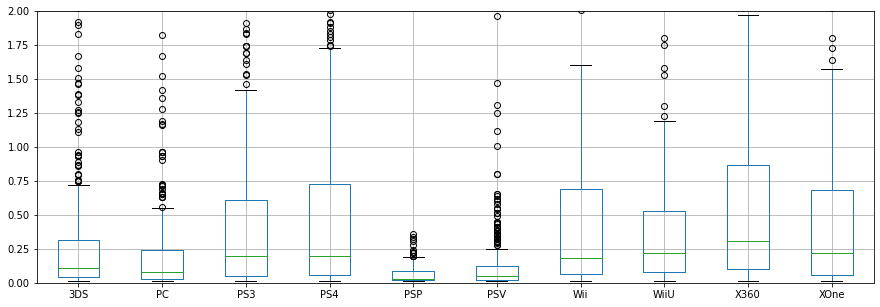

In [408]:
(data_actual.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum').
 plot(kind='box', ylim=(0,2),figsize=(15, 5), grid=True)
)

Исходя из диаграмм размаха можно сказать, что за актуальный период самыми прибыльными были платформы PS3, PS4, WiiU, X360, XOne - их медианные значения продаж наиболее высокие. 

**Выводы**
- Актуальным выбран период с 2012 по 2016 год. 
- Все платформы показывают снижение продаж. 
- На момент анализа наиболее прибыльными c точки зрения общего объема продаж являются PS4, XOne, 3DS, а также PC, которая показывает меньший, но достаточно стабильный объем продаж.
- За актуальный период самые высокие медианные значения продаж были у PS3, PS4, WiiU, X360, XOne.

#### 3.3. Анализ влияния оценок на продажи

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

In [409]:
#выведем кол-во оценок критиков и пользователей по каждой платформе
data_actual.pivot_table(index='platform', columns='year_of_release', values=['critic_score', 'user_score'], aggfunc='count')

critic_score                         user_score              \
year_of_release         2012  2013  2014  2015  2016       2012  2013  2014   
platform                                                                      
3DS                     33.0  20.0  22.0  19.0  10.0       34.0  25.0  22.0   
PC                      49.0  33.0  38.0  33.0  45.0       51.0  33.0  38.0   
PS3                     93.0  85.0  35.0   1.0   0.0       97.0  88.0  63.0   
PS4                      NaN  15.0  52.0  87.0  98.0        NaN  15.0  52.0   
PSP                      0.0   1.0   0.0   0.0   NaN        2.0   2.0   0.0   
PSV                     30.0  23.0  30.0  14.0  10.0       31.0  26.0  37.0   
Wii                      5.0   0.0   0.0   0.0   0.0       10.0   5.0   2.0   
WiiU                    20.0  27.0  15.0  19.0   9.0       20.0  32.0  19.0   
X360                    90.0  55.0  26.0   0.0   0.0       92.0  60.0  52.0   
XOne                     NaN  14.0  43.0  52.0  60.0        NaN  17.0  44.0   

                              
year_of_release  2015   2016  
platform                      
3DS              21.0   12.0  
PC               39.0   45.0  
PS3              26.0    9.0  
PS4              89.0  101.0  
PSP               0.0    NaN  
PSV              23.0   13.0  
Wii               0.0    0.0  
WiiU             20.0    9.0  
X360             24.0    7.0  
XOne             55.0   66.0

Выберем PS4, т.к. она входит в число популярных на 2016 год и по ней достаточно данных.

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


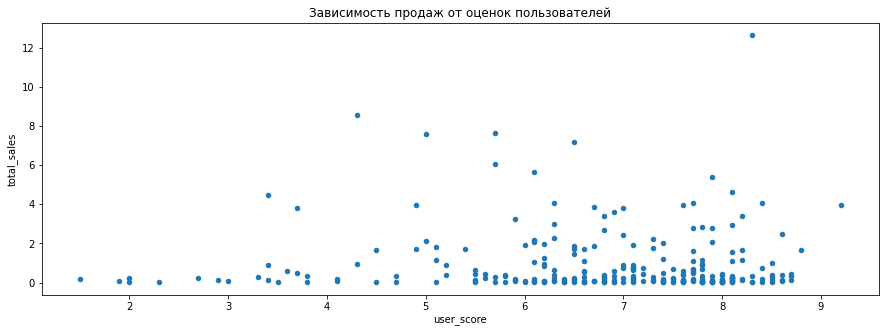

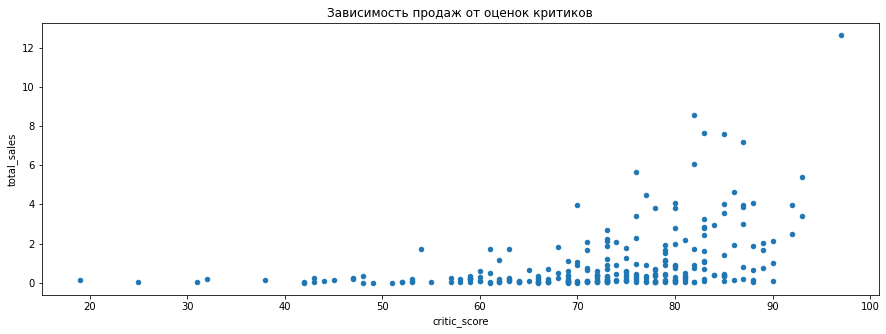

In [410]:
#строим диаграммы рассеяния
ps4 = data_actual.query('platform == "PS4"')
print(ps4.plot(x='user_score', y='total_sales', kind='scatter',\
               title='Зависимость продаж от оценок пользователей', figsize=(15, 5)))
print(ps4.plot(x='critic_score', y='total_sales', kind='scatter',\
               title='Зависимость продаж от оценок критиков', figsize=(15, 5)))

In [411]:
#вычисляем корреляцию
ps4_corr = ps4[['critic_score','user_score', 'total_sales']]
ps4_corr.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


Видим, что есть линейная зависимость между оценками критиков и пользователей. Между продажами и оценками пользователей линейной связи нет, между продажами и оценками критиков - есть, выражена слабо. Визуально по диаграмме рассеяния кажется, что все-таки оценки пользователей тоже влияют на прожажи, но связь выражена не ярко. Необходим дальшейший анализ. Также помним, что по данным с оценками много пропусков, поэтому результаты могут быть неполными.

Повторим расчеты для других популярных платформ, чтобы сравнить результаты. 

In [412]:
#вычисляем корреляцию для XOne
xone = data_actual.query('platform == "XOne"')
xone_corr = xone[['critic_score','user_score', 'total_sales']]
xone_corr.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
total_sales,0.416998,-0.068925,1.000000


In [413]:
#вычисляем корреляцию для 3DS
three_ds = data_actual.query('platform == "3DS"')
three_ds_corr = three_ds[['critic_score','user_score', 'total_sales']]
three_ds_corr.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.722762,0.320803
user_score,0.722762,1.000000,0.197583
total_sales,0.320803,0.197583,1.000000


In [414]:
#вычисляем корреляцию для PC
pc = data_actual.query('platform == "PC"')
pc_corr = pc[['critic_score','user_score', 'total_sales']]
pc_corr.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.432587,0.237243
user_score,0.432587,1.000000,-0.121867
total_sales,0.237243,-0.121867,1.000000


In [415]:
#вычисляем корреляцию для PS3
ps_three_long_period = data.query('platform == "PS3"')
ps_three_long_period_corr = ps_three_long_period[['critic_score','user_score', 'total_sales']]
ps_three_long_period_corr.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.631154,0.432759
user_score,0.631154,1.000000,0.128416
total_sales,0.432759,0.128416,1.000000


**Выводы**
- оценки пользователей и критиков зависят друг от друга;
- между продажами и оценками критиков есть слабая линейная зависимость;
- между продажами и оценками пользователей линейной зависимости нет;
- для более точной оценки наличия/отсутствия зависимости между продажами и оценками пользователей необходим дальнейший анализ и более полные данные. 

#### 3.4. Анализ игр по жанрам

In [416]:
#выведем на экран кол-во игр по жанрам, суммарные продажи и средний объем продаж на игру
genres_actual = data_actual.pivot_table(index='genre', values='total_sales', aggfunc=('count', 'sum', 'median', 'mean'))
genres_actual.columns = ['games_number', 'mean_sales_per_game', 'median_sales_per_game', 'total_sales']
genres_actual.sort_values(by='median_sales_per_game', ascending=False)

,games_number,mean_sales_per_game,median_sales_per_game,total_sales
genre,,,,
Shooter,235,1.296723,0.440,304.73
Sports,266,0.680301,0.240,180.96
Platform,83,0.726627,0.210,60.31
Role-Playing,368,0.499239,0.140,183.72
Racing,115,0.465217,0.140,53.50
Fighting,109,0.408165,0.130,44.49
Action,1016,0.432382,0.120,439.30
Misc,190,0.445053,0.120,84.56
Simulation,79,0.441899,0.120,34.91


<div class="alert alert-info">
 
Комментарий студента
    
Добавила еще средние продажи по игре

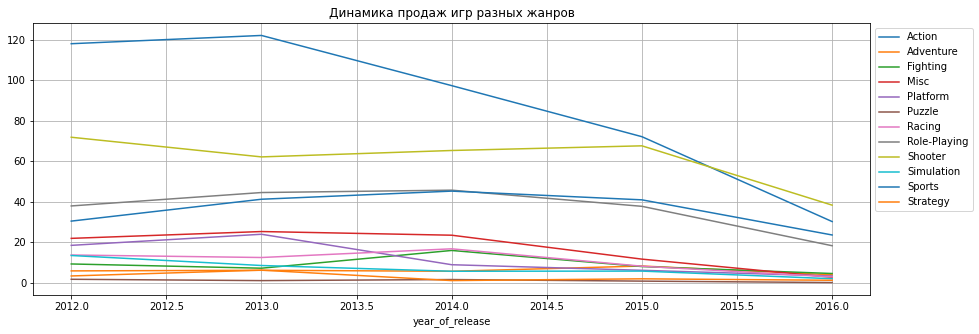

In [417]:
#посмотрим, как меняются продажи игр разных жанров во времени
(data_actual.pivot_table(index='year_of_release', columns = 'genre', values='total_sales', aggfunc='sum').
 plot(figsize=(15, 5), grid=True, title='Динамика продаж игр разных жанров').
 legend(bbox_to_anchor=(1.0, 1.0),
    fontsize='medium')
)

**Выводы**
- Набольшее число игр выпускается в жанрах Action, Role-Playing, Adventure. 
- Лидеры по общему объему продаж - Action, Shooter, Role-Playing. 
- Минимальные общие продажи в жанрах Strategy и Puzzle. 
- Самые высокие медианные показатели продаж (объемы продаж одной игры) в жанрах Shooter, Sports, Platform. Эти же жанры лидируют по средним показателям продаж.
- Все жанры показывают снижение продаж.

**Выводы по разделу**

В ходе исследования проведена следующая работа:
- проведен анализ количества игр, выпущенных в разные годы, и анализ продаж по разным платформам;
- выбран актуальных период для анализа и прогноза на 2017 год;
- определены потенциально прибыльные платформы;
- проведена оценка влияния отзывов пользователей и критиков на продажи;
- проведен анализ игр в разрезе жанров. 

Сделаны следующие основные выводы.
- В среднем срок жизни платформы 10 лет, большинство платформ появилось с 2004 по 2006.
- Актуальным выбран период с 2012 по 2016 год. 
- На момент анализа наиболее прибыльными платформами являются PS4, XOne, 3DS, а также PC, которая показывает меньший, но достаточно стабильный объем продаж. Но в целом все платформы показывают снижение продаж. 
- Между продажами и оценками критиков есть слабая линейная зависимость, между продажами и оценками пользователей линейной зависимости нет. Для более точной оценки наличия/отсутствия зависимости между продажами и оценками пользователей необходим дальнейший анализ и более полные данные.
- Лидеры по общему объему продаж - жанры Action, Shooter, Role-Playing. Минимальные продажи в жанрах Strategy и Puzzle. 
- Самые высокие медианные показатели продаж (объемы продаж одной игры) в жанрах Shooter, Sports, Platform.
- Все жанры показывают снижение продаж.

### 4. Портрет пользователя каждого региона

<AxesSubplot:title={'center':'Топ-5 платформ для Северной Америки'}, xlabel='platform'>

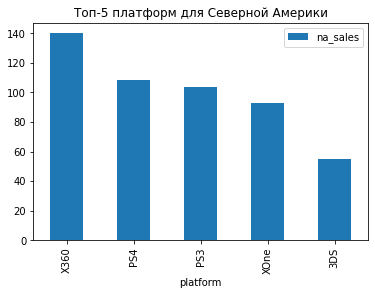

In [418]:
#выведем на экран топ-5 платформ для Северной Америки
(data_actual.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').
 sort_values(ascending=False, by = 'na_sales').head(5).
 plot(kind = 'bar', title='Топ-5 платформ для Северной Америки')
)

В Северной Америке предпочитают американские и японские консоли.

<AxesSubplot:title={'center':'Топ-5 платформ для Европы'}, xlabel='platform'>

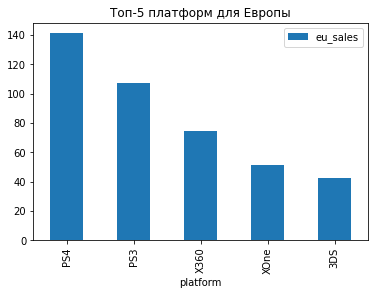

In [419]:
#выведем на экран топ-5 платформ для Европы
(data_actual.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').
 sort_values(ascending=False, by = 'eu_sales').head(5).
 plot(kind = 'bar', title='Топ-5 платформ для Европы')
)

В Европе топ-5 платформ совпадают с Северной Америкой, только объемы продаж смещены в сторону японских консолей.

<AxesSubplot:title={'center':'Топ-5 платформ для Японии'}, xlabel='platform'>

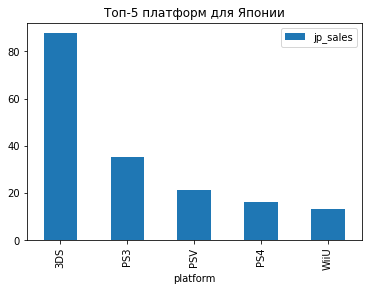

In [420]:
#выведем на экран топ-5 платформ для Японии
(data_actual.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').
 sort_values(ascending=False, by = 'jp_sales').head(5).
 plot(kind = 'bar', title='Топ-5 платформ для Японии')
)

Японцы предпочитают родные консоли.

<AxesSubplot:title={'center':'Топ-5 жанров для Северной Америки'}, xlabel='genre'>

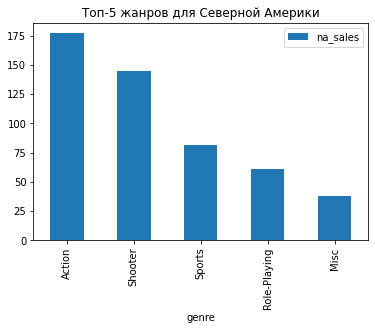

In [421]:
#выведем на экран топ-5 жанров для Северной Америки
(data_actual.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').
 sort_values(ascending=False, by = 'na_sales').head(5).
 plot(kind = 'bar', title='Топ-5 жанров для Северной Америки')
)

<AxesSubplot:title={'center':'Топ-5 жанров для Европы'}, xlabel='genre'>

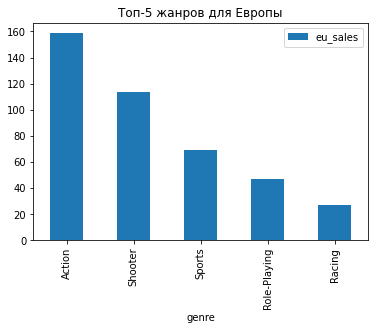

In [422]:
#выведем на экран топ-5 жанров для Европы
(data_actual.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').
 sort_values(ascending=False, by = 'eu_sales').head(5).
 plot(kind = 'bar', title='Топ-5 жанров для Европы')
)

<AxesSubplot:title={'center':'Топ-5 жанров для Японии'}, xlabel='genre'>

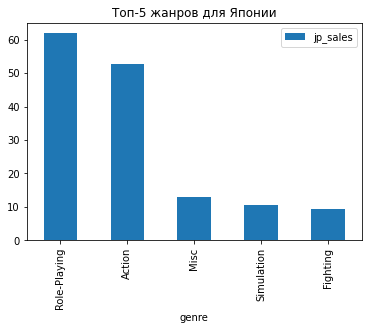

In [423]:
#выведем на экран топ-5 жанров для Японии
(data_actual.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').
 sort_values(ascending=False, by = 'jp_sales').head(5).
 plot(kind = 'bar', title='Топ-5 жанров для Японии')
)

Жанр Action вошел в топ-5 по всем регионам. Популярные жанры для Северной Америки и Европы практически совпадают (Action, Shooter, Sports, Role-Playing). В Японии основную долю продаж составляют Role-Playing и Action.

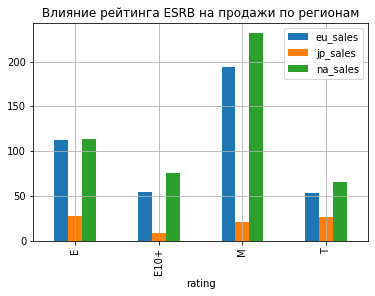

In [424]:
#оценим влияние рейтинга ESRB на продажи в отдельном регионе
esrb = data_actual.pivot_table(index = 'rating', values = ['na_sales','eu_sales','jp_sales'], aggfunc = 'sum')
esrb.plot(kind='bar', grid=True, title='Влияние рейтинга ESRB на продажи по регионам')
plt.legend()

**Выводы**
- В Северной Америке предпочитают американские и японские консоли: X360, PS4, PS3, XOne, 3DS *
- В Европе топ-5 платформ совпадают с Северной Америкой, только продажи смещены в сторону японских консолей: PS4, PS3, X360, XOne, 3DS*.
- Японцы предпочитают родные консоли: 3DS, PS3, PSV, PS4, WiiU*.
- Жанр Action вошел в топ-5 по всем регионам. Популярные жанры для Северной Америки и Европы практически совпадают (Action, Shooter, Sports, Role-Playing). В Японии основную долю продаж составляют Role-Playing и Action.
- Рейтинг ESRB влияет на продажи в отдельном регионе: для Северной Америки и Европы максимальные продажи отмечаются для игр с рейтингом М (для взрослых). В Японии лидирует E (для всех) с небольшим отрывом от Т (для подростков, 13+).

### 5. Проверка гипотез

В соответствии с заданием необходимо проверить две гипотезы:    
1. средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Гипотеза 1** 

- Нулевая гипотеза H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Альтернативная гипотеза Н1: Средние пользовательские рейтинги платформ Xbox One и PC разные. 

Зададим уровень статистической значимости alpha = 0,05. Построим гистограммы для визульной оценки распределений, затем с помощью теста Стьюдента вычислим p-value, сравним его с alpha и сделаем вывод о возможности или невозможности отвергнуть нулевую гипотезу. 

6.521428571428572
6.4286407766990274


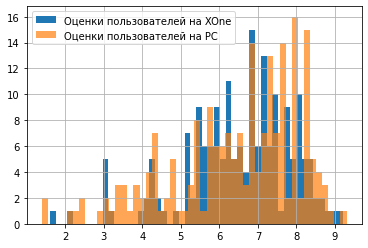

In [425]:
#строим гистограммы
xone_user_score = data_actual.query('(platform == "XOne") and (user_score > 0)')['user_score']
pc_user_score = data_actual.query('(platform == "PC") and (user_score > 0)')['user_score']
xone_user_score.hist(bins=50, alpha=1)
pc_user_score.hist(bins=50, alpha=0.7)
plt.legend(['Оценки пользователей на XOne', 'Оценки пользователей на PC'])
print(xone_user_score.mean())
print(pc_user_score.mean())

Визуально распределения похожи, средние значение близки. Проведем тест Стьюдента. 

In [426]:
alpha = 0.05 # уровень статистической значимости

# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(xone_user_score, pc_user_score, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Отвергнуть гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые - не удалось.

**Гипотеза 2** 

- Нулевая гипотеза H0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.
- Альтернативная гипотеза Н1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Зададим уровень статистической значимости alpha = 0,05. Построим гистограммы для визульной оценки распределений, затем с помощью теста Стьюдента вычислим p-value, сравним его с alpha и сделаем вывод о возможности или невозможности отвергнуть нулевую гипотезу. 

6.826679462571977
5.455897435897437


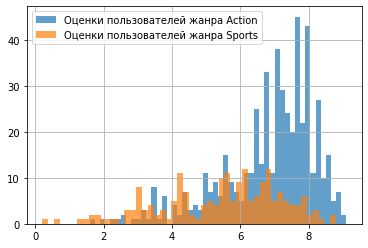

In [427]:
#строим гистограммы
action_user_score = data_actual.query('(genre == "Action") and (user_score > 0)')['user_score']
sports_user_score = data_actual.query('(genre == "Sports") and (user_score > 0)')['user_score']
action_user_score.hist(bins=50, alpha=0.7)
sports_user_score.hist(bins=50, alpha=0.7)
plt.legend(['Оценки пользователей жанра Action', 'Оценки пользователей жанра Sports'])
print(action_user_score.mean())
print(sports_user_score.mean())

Визуально распределения непохожи, средние значение также не слишком близки. Проведем тест Стьюдента. 

In [428]:
alpha = 0.05 # уровень статистической значимости

# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(action_user_score, sports_user_score, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 3.92811334545087e-20
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Общие выводы

Перед исследованием проведена следующая подготовка данных:
- заменили названия столбцов (привели к нижнему регистру);
- преобразовали данные в столбце с годом выпуска в целочисленный тип, т.к. год не может быть дробным;
- в столбце с оценками пользователей рейтинг tbd (не опеределен) заменили на пропуски;
- оценки пользователей привели к типу float;
- проверили данные на неявные дубликаты;
- посчитали суммарные продажи во всех регионах и записали их в отдельный столбец.

В ходе исследования проведена следующая работа:
- проведен анализ количества игр, выпущенных в разные годы, и анализ продаж по разным платформам;
- выбран актуальных период для анализа и прогноза на 2017 год;
- определены потенциально прибыльные платформы;
- проведена оценка влияния отзывов пользователей и критиков на продажи;
- проведен анализ игр в разрезе жанров;
- составлен портрет пользователя для каждого региона;
- проверены 2 гипотезы о средних пользовательских рейтингах. 

Сделаны следующие основные выводы.
- Рынок игр в целом показывает снижение. Также отмечается снижение продаж в разрезе платформ и жанров.
- На момент анализа наиболее прибыльными платформами являются PS4, XOne, 3DS, а также PC, которая показывает меньший, но достаточно стабильный объем продаж.
- За актуальный период самые высокие медианные значения продаж были у PS3, PS4, WiiU, X360, XOne.
- Самые высокие медианные показатели продаж (объемы продаж одной игры) в жанрах Shooter, Sports, Platform, Role-Playing. Эти же жанры лидируют по средним показателям продаж.
- На объемы продаж влияет региональная специфика:
  - В Северной Америке предпочитают американские и японские консоли: X360, PS4, PS3, XOne, 3DS.
  - В Европе топ-5 платформ совпадают с Северной Америкой, только продажи смещены в сторону японских консолей: PS4, PS3, X360, XOne, 3DS.
  - Японцы предпочитают родные консоли: 3DS, PS3, PSV, PS4, WiiU.
  - По объемам продаж жанр Action вошел в топ-5 по всем регионам. Популярные жанры для Северной Америки и Европы практически совпадают (Action, Shooter, Sports, Role-Playing). В Японии основную долю продаж составляют Role-Playing и Action.
- Рейтинг ESRB влияет на продажи в отдельном регионе: для Северной Америки и Европы максимальные продажи отмечаются для игр с рейтингом М (для взрослых). В Японии лидирует E (для всех) с небольшим отрывом от Т (для подростков, 13+).
- Оценки критиков везде влияют одинаково: чем выше, тем лучше. 

Итак, на объемы продаж игры влияют следующие факторы:
 - жанр;
 - регион;
 - платформа;
 - рейтинг ESRB (возратной рейтинг); 
 - оценки критиков. 

Рекомендации:
- При прогнозе на 2017 год следует постараться заполнить пропуски в оценках критиков и пользователей. Возможно, следует подключить дополнительные источники данных (сайты, сервисы), из которых можно подгружать оценки. В приоритете оценки критиков. 
- Прогноз следует делать в разрезе регионов, жанров, платформ, рейтинга ESRB, оценок критиков, а затем суммировать данные для прогноза на более высоком уровне. 
- Следует следить за появлением новых игровых платформ: одна из них потенциально может стать прибыльной. 
- При выборе потенциально прибыльных игр рекомендую обратить внимание на варианты с достаточным объемом рынка и хорошими медианными продажами:
  - в Северной Америке: Shooter, Sports с рейтингом М для X360, PS4, PS3, XOne (в порядке убывания). 
  - в Европе: Shooter, Sports с рейтингом М для PS4, PS3, X360, XOne (в порядке убывания). 
  - в Японии: Role-Playing с рейтингом Е или Т для 3DS и PS3 (на первой больше рынок, на второй выше медианные продажи).